In [1]:
from sklearn.tree import tree
from sklearn_porter import Porter
import numpy as np
import json

from sklearn.model_selection import train_test_split

In [2]:
with open('./data/y.json') as json_data:
    y = json.load(json_data)

In [3]:
with open('./data/X.json') as json_data:
    X = json.load(json_data)

### Split dataset

In [8]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) ## TODO do K_fold

In [9]:
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

from sklearn.model_selection import cross_val_score

In [10]:
clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2), n_estimators=250)

In [ ]:
scores = cross_val_score(clf, X, y, cv=5)

In [14]:
y_pred = clf.predict(X_test)

[[34818   856]
 [ 1890  2210]]


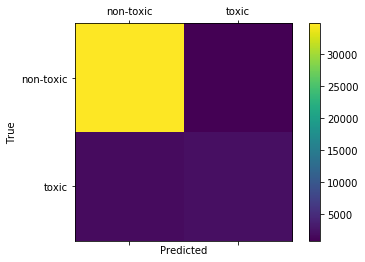

In [15]:
## stack-overflow

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

labels = ['non-toxic', 'toxic']
cm = confusion_matrix(y_test, y_pred)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96     35674
           1       0.72      0.54      0.62      4100

   micro avg       0.93      0.93      0.93     39774
   macro avg       0.83      0.76      0.79     39774
weighted avg       0.93      0.93      0.93     39774



### Port to javascript

In [22]:
from sklearn_porter import Porter

In [29]:
porter = Porter(clf, language='js')

In [30]:
output = porter.export(embed_data=True)

In [31]:
print(output)

var AdaBoostClassifier = function() {

    var findMax = function(nums) {
        var index = 0;
        for (var i = 0; i < nums.length; i++) {
            index = nums[i] > nums[index] ? i : index;
        }
        return index;
    };

    var forest = new Array();

    forest.push(function(features) {
        var classes = new Array(2);
        if (features[67] <= 0.5) {
            classes[0] = 0.6635573546538804; 
            classes[1] = 0.044862930463717546; 
        } else {
            classes[0] = 0.24070768276623525; 
            classes[1] = 0.050872032115592374; 
        }
        return classes;
    });
    
    forest.push(function(features) {
        var classes = new Array(2);
        if (features[42] <= 2.5) {
            classes[0] = 0.24786502714919684; 
            classes[1] = 0.09890356989127574; 
        } else {
            classes[0] = 0.5803420025414379; 
            classes[1] = 0.07288940041798003; 
        }
        return classes;
    });
    
    fores